# Image Display Tutorial

In this tutorial the basic methods to display images using functionalities implemented in FREDtools are presented. It has been prepared to help to start with data analysis using FREDtools. Refer to the FREDtools [documentation](https://fredtools.ifj.edu.pl) and [GitHub repository](https://github.com/jasqs/FREDtools) for more details. Any requests and issues are welcome by starting a new issue on the GitHub.

The examples below are prepared based on files available in the examples/exampleData.zip file on GitHub. Download the file and unzip it in the same folder as this jupyter notebook. See [FREDtools Tutorial](https://github.com/jasqs/FREDtools/blob/main/examples/FREDtools%20Tutorial.ipynb) for more details.

In [2]:
# Import of FREDtools and other useful modules
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk

import fredtools as ft
print("Current FREDtools version", ft.__version__)


Current FREDtools version 0.6.41


## Reading dicoms 

In this section it is presented how to read different types of dicom files.

In [3]:
# get absolute paths to dicoms in the exampleData folder
fileNames=ft.sortDicoms('exampleData/', recursive=True, displayInfo=True)

# get RN dicom plan info
planInfo=ft.getRNInfo(fileNames['RNfileNames'][0], displayInfo=True)

# get CT from dicoms
imgCT=ft.getCT(fileNames['CTfileNames'], displayInfo=False) # the imgCT is an instance of SimpleITK object

# read dose from RD dicoms for each field
imgDose=ft.getRD(fileNames['RDfileNames']) # there are two dicoms with dose, so imgDose will be a list of SimpleITK objects

# sum dose for images in the list
imgDose=ft.sumImg(imgDose, displayInfo=False)

# get RS structure dicom info
structInfo=ft.getRSInfo(fileNames['RSfileNames'][0], displayInfo=False) # the structInfo is a pandas DataFrame

# map some structures on the CT
imgROI1=ft.mapStructToImg(imgCT, 
                         structName='PTV_sphere', 
                         RSfileName=fileNames['RSfileNames'][0], 
                         displayInfo=False)

imgROI2=ft.mapStructToImg(imgCT, 
                         structName='testStuct_SphHoleDet', 
                         RSfileName=fileNames['RSfileNames'][0], 
                         displayInfo=False)


### sortDicoms ###
# Found dicoms: 240 x CT, 1 x RS, 1 x RN, 2 x RD, 0 x unknown
##################
### getRNInfo ###
# Patient name:     'RASISndwYCjIhgDE'
# Plan label:       'Sphere_2F'
# Plan date:        '20210702'
# Machine name:     'GTR4'
# Target structure: ''
# Number of fractions: 35
# Dose pres. (all fractions):    70.000 Gy RBE
# Dose pres. (single fraction):  2.000 Gy RBE
# Number of treatment fields: 2
# Number of setup fields:     0
#################


## Display dose image on a CT image

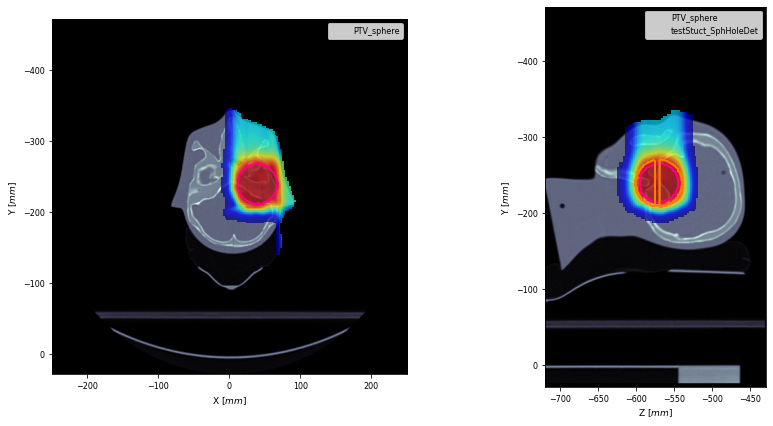

In [4]:
# set threshold for the imgDose on the level of 10% of the dose maximum. The values below this level will not be displayed.
statDose=ft.getStatistics(imgDose)    
imgDoseTh=sitk.Threshold(imgDose, lower=statDose.GetMaximum()*0.01, upper=1E5, outsideValue=np.nan)

# show two projections throug the dose centre of mass (by default) and specified point
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=[14,7]) 

ft.showSlice(ax1, imgA=imgDoseTh, imgB=imgCT, plane='XY', imgROIs=[imgROI1, imgROI2]) # not all contours on this slice so not displayed in the legend
ft.showSlice(ax2, imgA=imgDoseTh, imgB=imgCT, plane='ZY', point=[50, -230, -560], imgROIs=[imgROI1, imgROI2])


## Display three projections including interactive mode

The interactive mode can be used to move slices' depths in each direction. A mouse well can be used with the Shift pressed, as well as the slice position can be moved to the cursor position, also with the Shift pressed.

interactive(children=(FloatSlider(value=39.406676093913624, continuous_update=False, description='X [mm]:', ma…

interactive(children=(FloatSlider(value=-252.06256977202526, continuous_update=False, description='Y [mm]:', m…

interactive(children=(FloatSlider(value=-569.8276806680998, continuous_update=False, description='Z [mm]:', ma…

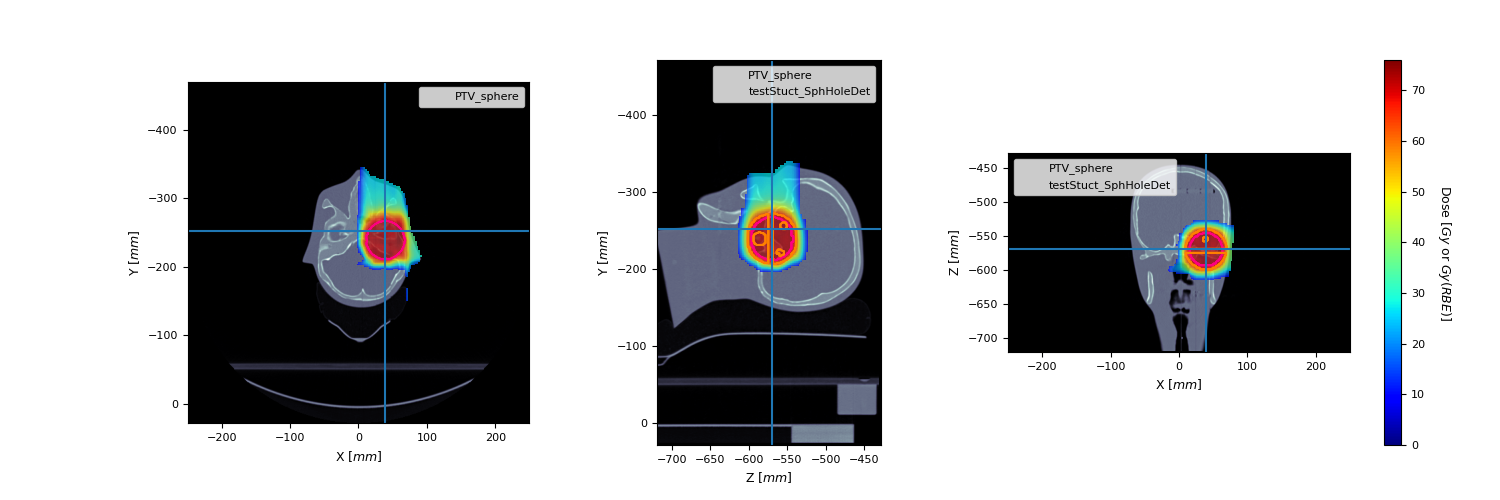

In [5]:
ft.showSlices(imgCT=imgCT, imgDose=imgDose, imgROIs=[imgROI1, imgROI2], interactive=True)
